# Ch.4 모델 훈련

## Linear Regression

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
X = 2*np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1) # y=4+3x+gaussian noise

In [16]:
X_b = np.c_[np.ones((100,1)), X] # 모든 샘플에 x0 = 1을 추가

### 정규방정식으로 선형회귀 풀기

In [17]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [18]:
theta_best

array([[3.87276538],
       [3.30744056]])

In [19]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [20]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [21]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.87276538],
       [10.4876465 ]])

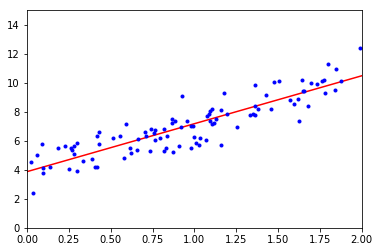

In [23]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### 같은 작업을 하는 사이킷런 코드

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lin_reg = LinearRegression()

In [26]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
lin_reg.intercept_, lin_reg.coef_

(array([3.87276538]), array([[3.30744056]]))

In [28]:
lin_reg.predict(X_new)

array([[ 3.87276538],
       [10.4876465 ]])

### 배치 경사 하강법

In [29]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

In [30]:
theta = np.random.randn(2,1) # 무작위 초기화

In [31]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [32]:
theta

array([[3.87276538],
       [3.30744056]])

### 확률적 경사 하강법

In [33]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케쥴 하이퍼파라미터

In [34]:
def learning_schedule(t):
    return t0 / (t+t1)

In [35]:
theta = np.random.randn(2,1)

In [36]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [37]:
theta

array([[3.85472253],
       [3.31517054]])

### 사이킷런에서 SGD

In [38]:
from sklearn.linear_model import SGDRegressor

In [39]:
sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [40]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.87506632]), array([3.29384333]))

## 다향 회귀

In [42]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

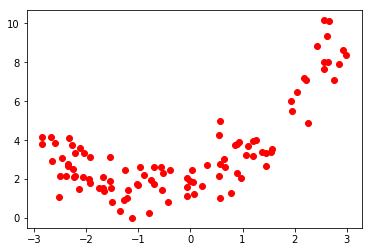

In [44]:
plt.plot(X, y, 'ro')

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [47]:
X_poly = poly_features.fit_transform(X)

In [48]:
X[0]

array([0.54487145])

In [49]:
X_poly[0]

array([0.54487145, 0.2968849 ])

In [50]:
lin_reg = LinearRegression()

In [51]:
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
lin_reg.intercept_, lin_reg.coef_

(array([1.85364624]), array([[0.89361105, 0.55219373]]))

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [55]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='training set')
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label='validation set')

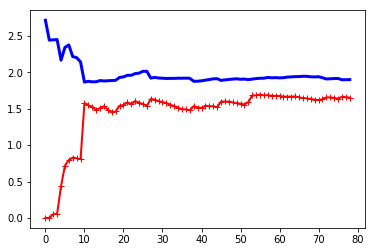

In [56]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

In [57]:
from sklearn.pipeline import Pipeline

In [58]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),])

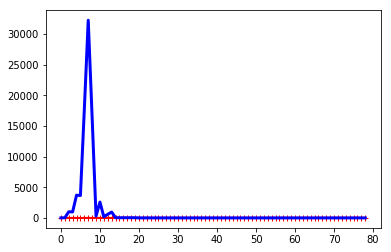

In [59]:
plot_learning_curves(polynomial_regression, X, y)